<a href="https://colab.research.google.com/github/jamagiwa/Practice_python/blob/main/Basics/Titanic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanicのデータで解析の練習をしてみる


#とりあえず解析

##データの形を見てみる

列	変数	内容	Key情報など
1	PassengerId	乗客ID	ユニークキー
2	Survived	生死(目的変数)	0 = No(死亡), 1 = Yes(生存)。テストデータには存在しない列
3	Pclass	席等級	1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
4	Name	姓名
5	Sex	性	male/female
6	Age	年齢	Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
7	SibSp	同乗した姉妹兄弟と配偶者数	Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
8	Parch	同乗した両親子ども数	Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
9	Ticket	チケット番号
10	Fare	料金	親子で2席買ったら合計料金になるっぽい
11	Cabin	キャビン番号	欠損値多い
12	Embarked	乗船港	C = Cherbourg, Q = Queenstown, S = Southampton

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#CSVのURL
URL = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"

df = pd.read_csv(URL)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

##欠損値の確認

In [155]:
#nullデータをカウントする
print(df.isnull().sum())
#cabvinは後でグループ化して解析するから消さない。ageが厄介だから平均値で埋める
#埋める前にageの年齢のグラフを作成してみる

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##Ageを平均値で埋めるのは妥当か？グラフをつくてみる

Text(0, 0.5, 'age')

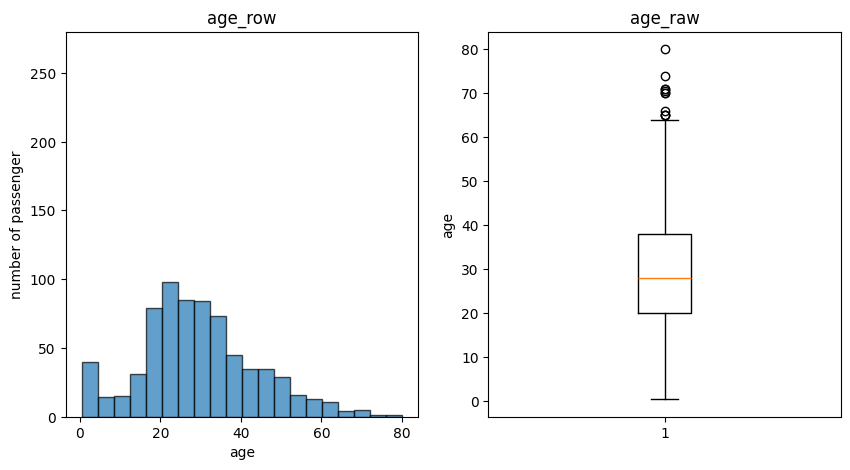

In [156]:
#raw dataでヒストグラムを作成
#ageを抽出,
age_raw = df["Age"]

#rowdataをhistgramとboxplotで見てみる
#1, 2の行列に配置
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(age_raw, bins = 20, alpha = 0.7, edgecolor = "black")
axes[0].set_title("age_row")
axes[0].set_xlabel("age")
axes[0].set_ylabel("number of passenger")
axes[0].set_ylim(0, 280)
#boxplotは欠損値を描画できないので除去する
axes[1].boxplot(age_raw.dropna())
axes[1].set_title("age_raw")
axes[1].set_ylabel("age")

Text(0, 0.5, 'age')

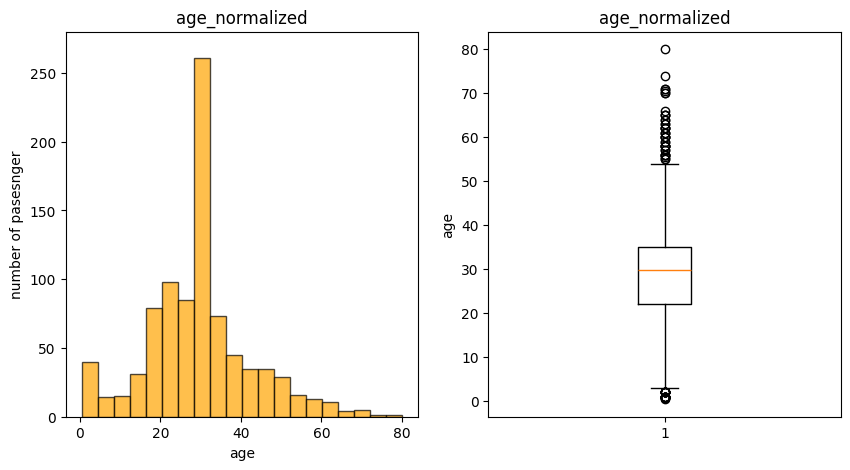

In [157]:
#ageの欠損値をageで埋めてみる
#fillna(0)は欠損値を０で埋める
age_imputed = df["Age"].fillna(df["Age"] .mean())

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].hist(age_imputed, bins = 20, alpha = 0.7, edgecolor = "black", color = "orange")
axes[0].set_title("age_normalized")
axes[0].set_xlabel("age")
axes[0].set_ylabel("number of pasesnger")
axes[0].set_ylim(0, 280)

axes[1].boxplot(age_imputed.dropna())
axes[1].set_title("age_normalized")
axes[1].set_ylabel("age")

めちゃくちゃデータの形が変わる、中央値なども同様に変化してしまうのであろう

##生存率を他の変数と比較してみる。

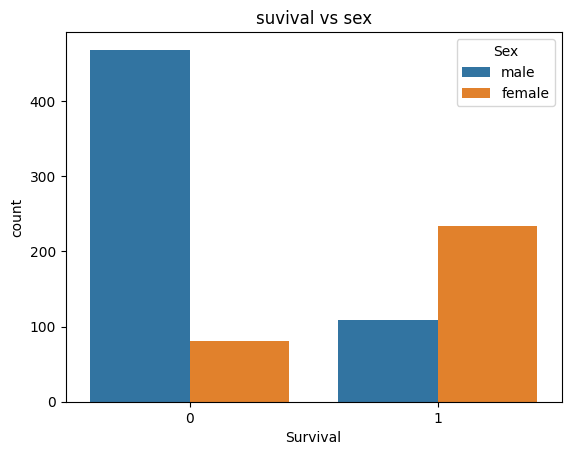

In [158]:
#sexとsuvivalの関係
sns.countplot(x = df['Survived'], hue = df['Sex'], data = df)
plt.title("suvival vs sex")
plt.xlabel("Survival")
plt.ylabel("count")


plt.show()

死傷者は明らかに男性の方が多く見える

年齢別に見てみる

/tmp/ipython-input-4185732814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['Survived'], y = age_imputed, data = df, palette = {"0" : "skyblue", "1" : "orange"})


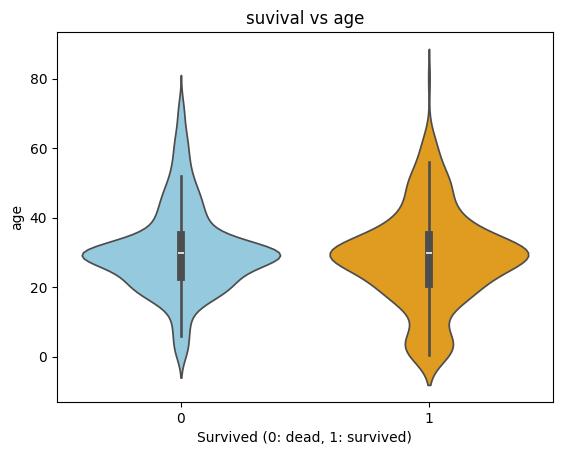

In [159]:
#ageとsuvivalの関係
sns.violinplot(x = df['Survived'], y = age_imputed, data = df, palette = {"0" : "skyblue", "1" : "orange"})
plt.title("suvival vs age")
plt.xlabel("Survived (0: dead, 1: survived)")
plt.ylabel("age")
plt.show()

生存者、死傷者の中央値はほとんど変わらない、子供の方が生存者が多い

年齢と生存関係の中には、性別が含まれている。

suvivalに年齢と性別が関わっていることを示したい。data-ink ratioを考慮して合体してみる。


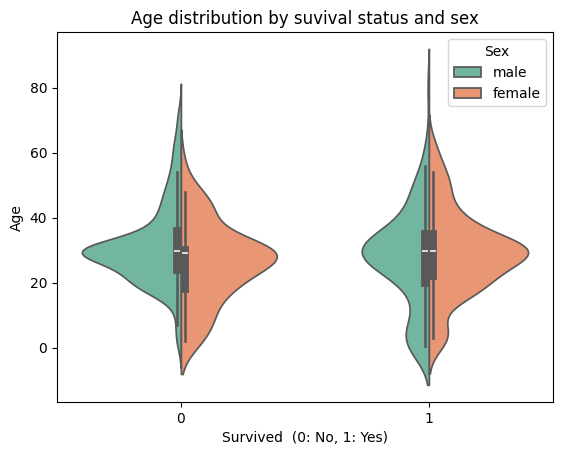

In [160]:
sns.violinplot(x = "Survived",
               y = age_imputed,
               hue = "Sex",
               data = df,
               split = True,#boolの場合False
               palette = "Set2"
               )
plt.title("Age distribution by suvival status and sex")
plt.xlabel("Survived  (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

男児はほとんど生存と考えても良さそう。女性児は割と死傷者がが多い

##そもそもの男女比を見てみる

/tmp/ipython-input-603416708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Sex",


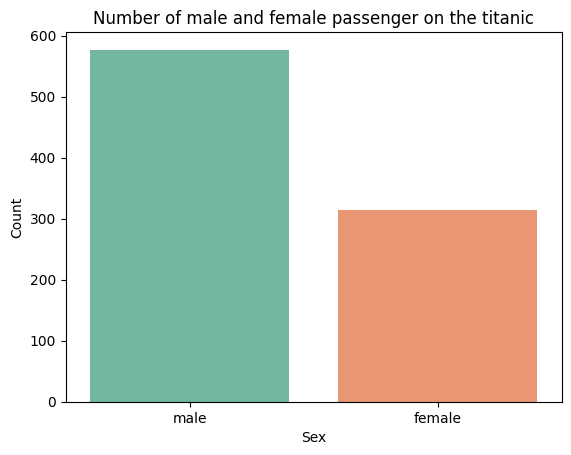

In [161]:
sns.countplot(x = "Sex",
              data = df,
              palette = "Set2")
plt.title("Number of male and female passenger on the titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

二倍近くの差がある。

男女別の年齢比率を見てみる

/tmp/ipython-input-1012685648.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "Sex",


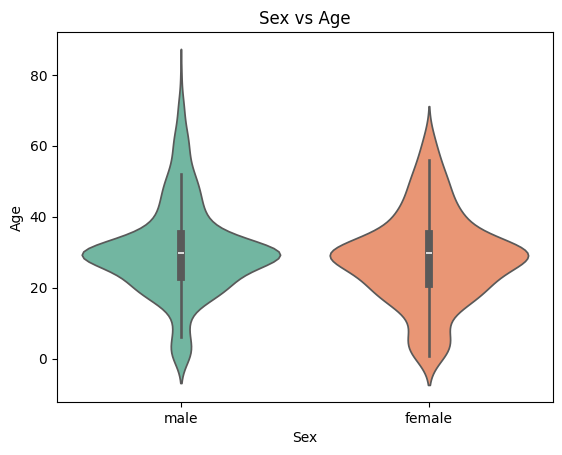

In [162]:
sns.violinplot(x = "Sex",
               y = age_imputed,
               data = df,
               palette = ("Set2"))
plt.title("Sex vs Age")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

子供は女性の方が多いっぽいが中央値や4分位範囲は変わらなそう

##それぞれのパラメータで相関係数を見てみる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


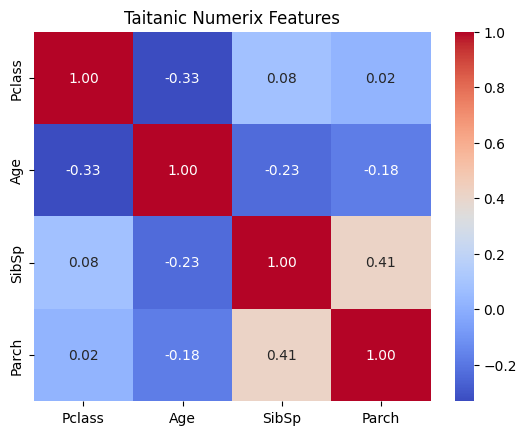

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.info())
#数値データのみしか扱えないため、数値データを抽出する
numeric_df = df[["Pclass", "Age", "SibSp", "Parch"] ]

#欠損値を平均値で保管する
numeeric_df_normalized = numeric_df.fillna(numeric_df.mean())

#相関行列の計算
correlation_matrix = numeeric_df_normalized.corr()

#hiatmapの作成
sns.heatmap(correlation_matrix,
            annot = True,  #数値をセルに表示,
            cmap = "coolwarm",  #色のグラデーション
            fmt = ".2f" #小数点第2位まで表示
)
plt.title("Taitanic Numerix Features")
plt.show()

分かりにくい、座席の等級都生存率は関係ありそう→バイオリンプロット

##座席と生存率はどうか

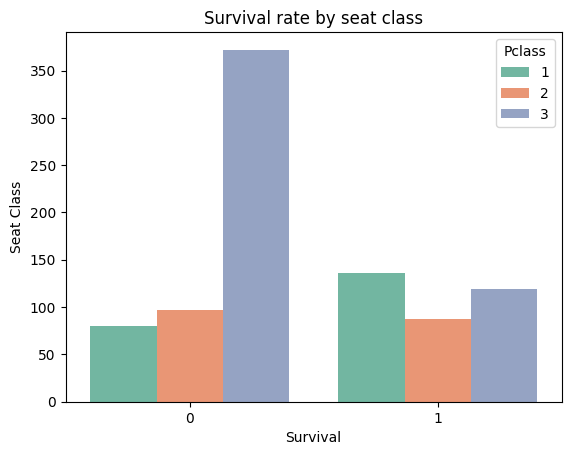

In [164]:
#生存率と座席の等級を見る→両方ともカテゴリの値だからhistgram?
sns.countplot(x = "Survived",
              hue = "Pclass",
              data = df,
              palette=  "Set2")

plt.title("Survival rate by seat class")
plt.xlabel("Survival")
plt.ylabel("Seat Class")
plt.show()

   Pclass pclass_labeled
0       3      Low class
1       1    Hight class
2       3      Low class
3       1    Hight class
4       3      Low class


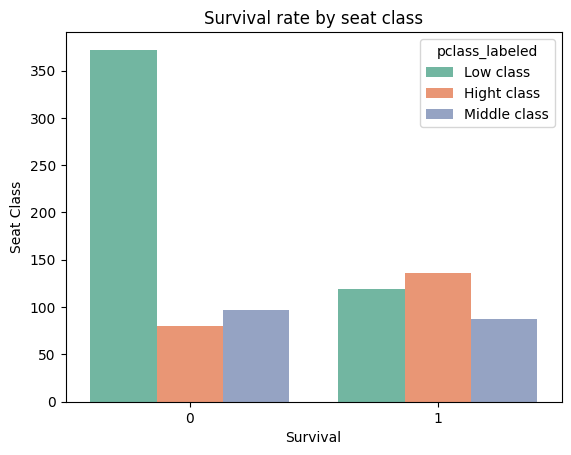

In [165]:
#ラベル入れないと分かりにくい
#pclassのdictionalyを作成する
pclass_mapping = {
    1: "Hight class",
    2: "Middle class",
    3: "Low class"
}
#map()を使って新しい列の作成
df["pclass_labeled"] = df["Pclass"].map(pclass_mapping) #Pclassにpclass_mappingを被せて、pclass_labeled列を追加する

print(df[["Pclass", "pclass_labeled"]].head())

sns.countplot(x = "Survived",
              hue = "pclass_labeled",
              data = df,
              palette=  "Set2")

plt.title("Survival rate by seat class")
plt.xlabel("Survival")
plt.ylabel("Seat Class")
plt.show()

これだけみると明らかにlow classの方が死傷者が多いが人数位を見てみる

/tmp/ipython-input-1370988163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "pclass_labeled",


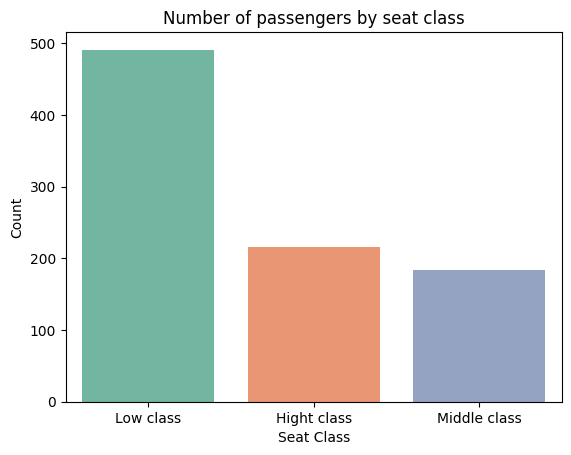

In [168]:
#座席別の人数比を見てみる
sns.countplot(x = "pclass_labeled",
              palette = "Set2",
              data = df)

plt.title("Number of passengers by seat class")
plt.xlabel("Seat Class")
plt.ylabel("Count")
plt.show()

low classが最も多いからまあ妥当なのかもしれない, 割合とかを出してみる
